In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

sweep = []
folder = "."
id = []

#regex for finding number after "result" in file name


#loop over txt files in the current directory
for file in os.listdir(folder):
    #skip files that are not txt files
    if not file.endswith(".txt"):
        continue
    #skip files that are not result files
    if not file.startswith("result"):
        continue
    #join folder and file name
    file = os.path.join(folder, file)
    header = np.loadtxt(file, delimiter=",", max_rows=1)
    
    data = np.loadtxt(file, delimiter=",",skiprows=1)
    id.append(float(header))
    sweep.append(data)

#sort data by id
sweep = [x for _,x in sorted(zip(id,sweep))]
id.sort()


[0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095]

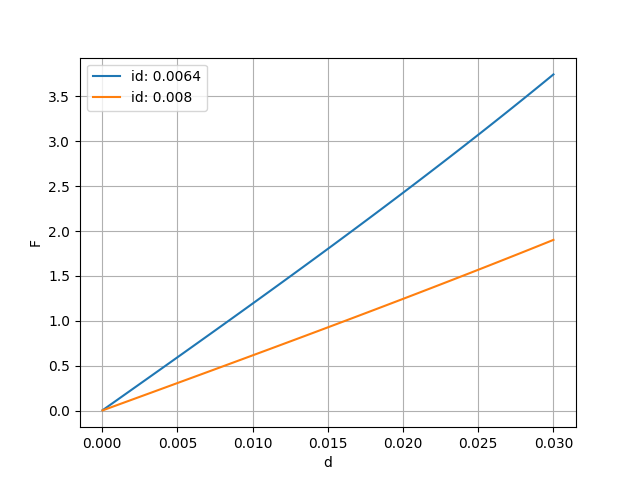

Text(0.5, 1.0, 'Force Profile serpentine')

In [3]:
#loop over sweep and plot the 2nd and 3rd columns of each data array in a new subplot
#create 3d plot
%matplotlib ipympl
fig = plt.figure()


for key,data in zip(id,sweep):
    plt.plot(data[:,1], data[:,2], label="id: "+str(key))
    #change line style for each line, dashed, dotted, solid
    

    


plt.grid()

plt.xlabel("d")
plt.ylabel("F")
plt.legend()
plt.show()
plt.title("Force Profile serpentine")


[124.854084, 63.394367666666675]


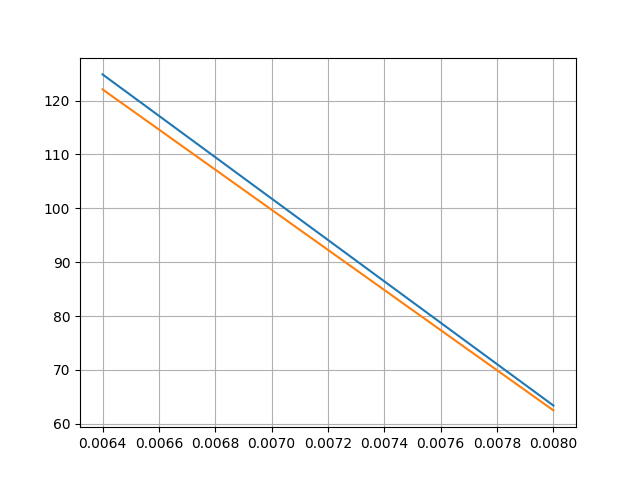

In [7]:
stiffnesses = []
for data in sweep:
    stiffnesses.append(data[-1,2]/data[-1,1])

print(stiffnesses)

flexurelengths = id

plt.figure()
plt.plot(flexurelengths, stiffnesses)
plt.grid()

E=2.2e9
t = 5e-3
w=0.4e-3
smax = 65e6
l= np.array(flexurelengths)
N=22

k = E*t*w**3/l**3/N

plt.plot(l,k)


In [44]:
#Calculating the length of the beams and the number of beams needed to for a given stiffness

E=2.2e9
t = 5e-3
w=0.6e-3
smax = 65e6

C = 120 #N/m
R = 30e-3


I = t*w**3/12

L = smax*t*w**2/3/C/R

# print(f"max length: {L*1e3} mm")

N = 12*E*I/L**3/C
N = np.ceil(N)
L = (12*E*I/N/C)**(1/3)
print(f"max length: {L*1e3} mm")
print(f"min number of beams: {N}")
C = 12*E*I/L**3/N
print(f"stiffness: {C} N/m")

max length: 10.73614584509471 mm
min number of beams: 16.0
stiffness: 119.9999999999999 N/m


281.6

smax = 65.62499999999999 MPa
